In [1]:
#Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import SparseRandomProjection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from matplotlib.pyplot import subplots, show
%matplotlib inline

In [2]:
#Dataset 1
#Import data of ads dataset from csv file
data1=pd.read_csv('ads.csv',low_memory=False)

In [3]:
#Null values are removed from dataset1
data1 = data1.applymap(lambda val: np.nan if str(val).strip() == '?' else val)
data1 = data1.dropna()

In [4]:
# First column is removed as it is just a row number
df = data1.iloc[:,1:].reset_index(drop=True)

In [5]:
#Factorization (replacing category of column 1558 with a number)
df.loc[df['1558'] == 'ad.', '1558'] = 1
df.loc[df['1558'] == 'nonad.', '1558'] = 0

In [6]:
#Scaling the data
sc = StandardScaler()

# Scaling features and extracting targets
x = df.iloc[:,:-1]
x = pd.DataFrame(sc.fit_transform(x), index=x.index, columns=x.columns)
y = pd.DataFrame(df.iloc[:, -1]).astype(float)

D:\Installations\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Installations\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
#Splitting data for Test and Training purpose
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:

# First, I am training the model without dimensionality reduction(PCA/Random Projection) and the accuracy is noted
#I am using Decision Tree, SVM, KNN models
# Later I am applying Dimensionality Reduction to the dataset with various components/dimensions and train the respective model
# Accuracies at various components are noted and a graph is plotted.


In [9]:
# Decision tree model

#DT model is applied to the data without performing Dimensionality Reduction so that we can compare this accuracy with 
#accuracies after Dimensionality Reduction

DT_gini_model = DecisionTreeClassifier()
DT_gini_model.fit(X_train, y_train)

#Accuracy of model without using PCA or Random Projection
baseline_DT = metrics.accuracy_score(DT_gini_model.predict(X_test), y_test)*100

In [10]:
#Accuracy obtained using Decision Tree without Dimensionality Reduction
baseline_DT

95.76271186440678

In [11]:
#Dimensionality Reduction starts
# TO store the accuracies of PCA and Random projection at different dimensions

pca_accuracy=pd.DataFrame( columns=['accuracy','components']);
rp_accuracy=pd.DataFrame( columns=['accuracy','components']);

#Storing the number of dimensions/components to which we need to reduce and evaluate data
C = [50,100,150,200,250,300,350,400,450,500];

In [12]:
#Training and finding accuracy of Decision tree model using PCA at different dimensions as initialized in variable C

for components in C:
    #Applying PCA for the Training data
    pca1=PCA(n_components=components)
    X=pca1.fit_transform(X_train)
    PCA(copy=True, iterated_power='auto', n_components=components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    
    #Decision tree after applying PCA
    model = DecisionTreeClassifier()
    model.fit(X, y_train)
    
    # evaluate the model and accuracies at respective components are noted
    test = pca1.transform(X_test)
    a=accuracy_score(model.predict(test), y_test)*100
    pca_accuracy=pca_accuracy.append([{'accuracy' : a, 'components' : components}])

In [13]:
#Training and finding accuracy of Decision tree model using Sparse Random Projection at different dimensions as initialized in variable C

for components in C:
    #Applying Sparse Random Projection for the Training data
    srp = SparseRandomProjection(n_components = components)
    X = srp.fit_transform(X_train)
    
    #Decision tree after applying Sparse Random Projection
    model = DecisionTreeClassifier()
    model.fit(X, y_train)
    
    # evaluate the model and accuracies at respective components are noted
    test = srp.transform(X_test)
    a=accuracy_score(model.predict(test), y_test)*100
    rp_accuracy=rp_accuracy.append([{'accuracy' : a, 'components' : components}])

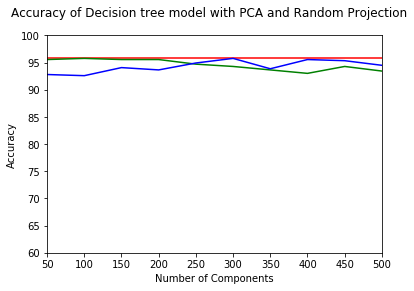

In [14]:
# Plot a graph of accuracies obtained at various components/dimensions using Decision tree
plt.figure()
plt.suptitle("Accuracy of Decision tree model with PCA and Random Projection")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xlim([50, 500])
plt.ylim([60, 100])
 
# plot the baseline,PCA,Random Projection accuracies
plt.plot(pca_accuracy['components'], [baseline_DT] * len(pca_accuracy['accuracy']), color = "r")
plt.plot(pca_accuracy['components'], pca_accuracy['accuracy'], color='g')
plt.plot(rp_accuracy['components'], rp_accuracy['accuracy'], color='b')

plt.show()

In [15]:
#SVM model

#SVM model is applied to the data without performing Dimensionality Reduction so that we can compare this accuracy with 
#accuracies after Dimensionality Reduction

from sklearn.svm import SVC

svm_baseline = SVC(kernel='linear')
svm_baseline.fit(X_train, y_train.values.ravel())

#Accuracy of model without using PCA or Random Projection
baseline_svm = metrics.accuracy_score(svm_baseline.predict(X_test), y_test)*100

In [16]:
#Accuracy obtained using Decision Tree without Dimensionality Reduction
baseline_svm

95.76271186440678

In [17]:
#To store accuracies at different components of SVM model
pca_accuracy_svm=pd.DataFrame( columns=['accuracy','components']);
rp_accuracy_svm=pd.DataFrame( columns=['accuracy','components']);

In [18]:
#Training and finding accuracy of SVM model using PCA
for components in C:
    #Applying PCA for the Training data
    pca1=PCA(n_components=components)
    X=pca1.fit_transform(X_train)
    PCA(copy=True, iterated_power='auto', n_components=components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    
    #Decision tree after applying PCA
    model = SVC(kernel='linear')
    model.fit(X, y_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = pca1.transform(X_test)
    a=accuracy_score(model.predict(test), y_test)*100
    pca_accuracy_svm=pca_accuracy_svm.append([{'accuracy' : a, 'components' : components}])

In [19]:
#Training and finding accuracy of SVM model using Sparse Random Projection
for components in C:
    #Applying Sparse Random Projection for the Training data
    srp = SparseRandomProjection(n_components = components)
    X = srp.fit_transform(X_train)
    
    #Decision tree after applying Sparse Random Projection
    model = SVC(kernel='linear')
    model.fit(X, y_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = srp.transform(X_test)
    a=accuracy_score(model.predict(test), y_test)*100
    rp_accuracy_svm=rp_accuracy_svm.append([{'accuracy' : a, 'components' : components}])

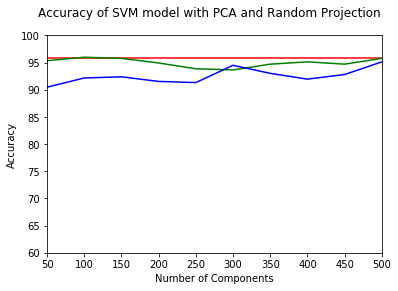

In [20]:
# Plot a graph of number of components used vs accuracies obtained using SVM model
plt.figure()
plt.suptitle("Accuracy of SVM model with PCA and Random Projection")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xlim([50, 500])
plt.ylim([60, 100])
 
# plot the baseline and random projection accuracies
plt.plot(pca_accuracy_svm['components'], [baseline_svm] * len(pca_accuracy_svm['accuracy']), color = "r")
plt.plot(pca_accuracy_svm['components'], pca_accuracy_svm['accuracy'], color='g')
plt.plot(rp_accuracy_svm['components'], rp_accuracy_svm['accuracy'], color='b')

plt.show()

In [21]:
#K Nearest Neighbour (with 5 neighbours)
#KNN model without Dimensionality reduction(no PCA/RP)

from sklearn.neighbors import KNeighborsClassifier

knn_baseline = KNeighborsClassifier(n_neighbors=5)
knn_baseline.fit(X_train, y_train.values.ravel())

#Accuracy of model without using PCA or Random Projection
baseline_knn = metrics.accuracy_score(knn_baseline.predict(X_test), y_test)*100

In [22]:
baseline_knn

93.64406779661016

In [23]:
#To store accuracy of models
pca_accuracy_knn=pd.DataFrame( columns=['accuracy','components']);
rp_accuracy_knn=pd.DataFrame( columns=['accuracy','components']);

In [24]:
#Training and finding accuracy of KNN model using PCA at different dimensions as initialized in variable C
for components in C:
    #Applying PCA for the Training data
    pca1=PCA(n_components=components)
    X=pca1.fit_transform(X_train)
    PCA(copy=True, iterated_power='auto', n_components=components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    
    #Decision tree after applying PCA
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X, y_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = pca1.transform(X_test)
    a=accuracy_score(model.predict(test), y_test)*100
    pca_accuracy_knn=pca_accuracy_knn.append([{'accuracy' : a, 'components' : components}])

In [25]:
#Training and finding accuracy of KNN model using Sparse Random Projection at different dimensions as initialized in variable C
for components in C:
    #Applying Sparse Random Projection for the Training data
    srp = SparseRandomProjection(n_components = components)
    X = srp.fit_transform(X_train)
    
    #Decision tree after applying Sparse Random Projection
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X, y_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = srp.transform(X_test)
    a=accuracy_score(model.predict(test), y_test)*100
    rp_accuracy_knn=rp_accuracy_knn.append([{'accuracy' : a, 'components' : components}])

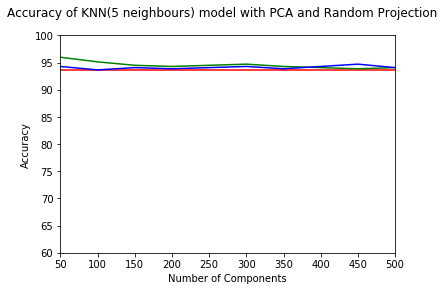

In [26]:
# Plot a graph of number of components used vs accuracies obtained using KNN model
plt.figure()
plt.suptitle("Accuracy of KNN(5 neighbours) model with PCA and Random Projection")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xlim([50, 500])
plt.ylim([60, 100])
 
# plot the baseline and random projection accuracies

plt.plot(pca_accuracy_knn['components'], [baseline_knn] * len(pca_accuracy_knn['accuracy']), color = "r")
plt.plot(pca_accuracy_knn['components'], pca_accuracy_knn['accuracy'], color='g')
plt.plot(rp_accuracy_knn['components'], rp_accuracy_knn['accuracy'], color='b')

plt.show()

In [27]:

# In the above part I have used a dataset 'ads.csv' which was having around 1558 columns and accuracies of differet models were fetched.
# Now I am using another dataset with 57 columns and following the same processes as above and finding difference of output
# when PCA and Random Projections are used.


In [28]:
#Fetching data from spambase dataset
data2=pd.read_csv('spambase.data',low_memory=False,header=None)

In [29]:
#Null values are removed from dataset2
data2 = data2.applymap(lambda val: np.nan if str(val).strip() == '?' else val)
data2 = data2.dropna()

In [30]:
#Scaling the data
sc = StandardScaler()

# Scaling features and extracting targets
x2 = data2.iloc[:,:-1]
x2 = pd.DataFrame(sc.fit_transform(x2), index=x2.index, columns=x2.columns)
y2 = pd.DataFrame(data2.iloc[:, -1]).astype(float)

D:\Installations\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Installations\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
#Splitting dataset2 for Test and Training purpose
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [32]:
#Decision tree model
#DT model is applied to the dataset2 without performing Dimensionality Reduction so that we can compare this accuracy with 
#accuracies after Dimensionality Reduction
DT_gini_model2 = DecisionTreeClassifier()
DT_gini_model2.fit(X2_train, y2_train)

#Accuracy of model without using PCA or Random Projection
baseline_DT2 = metrics.accuracy_score(DT_gini_model2.predict(X2_test), y2_test)*100

In [33]:
#Accuracy of Decision tree model obtained without Dimensionality Reduction
baseline_DT2

89.57654723127035

In [34]:

#Dimensionality Reduction starts
# TO store the accuracies of PCA and Random projection at different dimensions
pca_accuracy2=pd.DataFrame( columns=['accuracy','components']);
rp_accuracy2=pd.DataFrame( columns=['accuracy','components']);

#Storing the number of dimensions/components to which we need to reduce and evaluate data
C2 = [5,10,15,20,25,30];


In [35]:

#Training and finding accuracy of Decision tree model using PCA
for components in C2:
    #Applying PCA for the Training data
    pca1=PCA(n_components=components)
    X=pca1.fit_transform(X2_train)
    PCA(copy=True, iterated_power='auto', n_components=components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    
    #Decision tree after applying PCA
    model = DecisionTreeClassifier()
    model.fit(X, y2_train)
    
    # evaluate the model and accuracies at respective components are noted
    test = pca1.transform(X2_test)
    a=accuracy_score(model.predict(test), y2_test)*100
    pca_accuracy2=pca_accuracy2.append([{'accuracy' : a, 'components' : components}])

In [36]:
#Training and finding accuracy of Decision tree model using Sparse Random Projection
for components in C2:
    #Applying Sparse Random Projection for the Training data
    srp = SparseRandomProjection(n_components = components)
    X = srp.fit_transform(X2_train)
    
    #Decision tree after applying Sparse Random Projection
    model = DecisionTreeClassifier()
    model.fit(X, y2_train)
    
    # evaluate the model and accuracies at respective components are noted
    test = srp.transform(X2_test)
    a=accuracy_score(model.predict(test), y2_test)*100
    rp_accuracy2=rp_accuracy2.append([{'accuracy' : a, 'components' : components}])

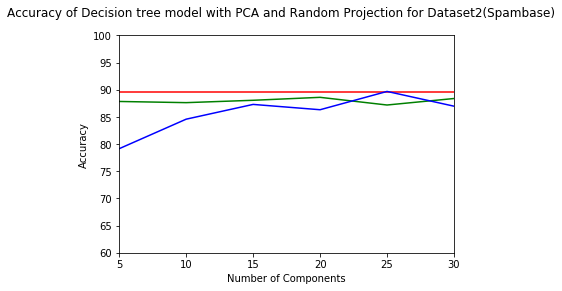

In [37]:

# Plot a graph of accuracies obtained at various components/dimensions using Decision tree
plt.figure()
plt.suptitle("Accuracy of Decision tree model with PCA and Random Projection for Dataset2(Spambase)")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xlim([5, 30])
plt.ylim([60, 100])
 
# plot the baseline and random projection accuracies

plt.plot(pca_accuracy2['components'], [baseline_DT2] * len(pca_accuracy2['accuracy']), color = "r")
plt.plot(pca_accuracy2['components'], pca_accuracy2['accuracy'], color='g')
plt.plot(rp_accuracy2['components'], rp_accuracy2['accuracy'], color='b')

plt.show()

In [38]:
#SVM model
#SVM model without Dimensionality reduction(no PCA/RP)

from sklearn.svm import SVC

svm_baseline2 = SVC(kernel='linear')
svm_baseline2.fit(X2_train, y2_train.values.ravel())

#Accuracy of model without using PCA or Random Projection
baseline_svm2 = metrics.accuracy_score(svm_baseline2.predict(X2_test), y2_test)*100

In [39]:
baseline_svm2

91.20521172638436

In [40]:
#To store accuracy of models

pca_accuracy_svm2=pd.DataFrame( columns=['accuracy','components']);
rp_accuracy_svm2=pd.DataFrame( columns=['accuracy','components']);

In [41]:
#Training and finding accuracy of SVM model using PCA
for components in C2:
    #Applying PCA for the Training data
    pca1=PCA(n_components=components)
    X=pca1.fit_transform(X2_train)
    PCA(copy=True, iterated_power='auto', n_components=components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    
    #Decision tree after applying PCA
    model = SVC(kernel='linear')
    model.fit(X, y2_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = pca1.transform(X2_test)
    a=accuracy_score(model.predict(test), y2_test)*100
    pca_accuracy_svm2=pca_accuracy_svm2.append([{'accuracy' : a, 'components' : components}])

In [42]:
#Training and finding accuracy of SVM model using Sparse Random Projection
for components in C2:
    #Applying Sparse Random Projection for the Training data
    srp = SparseRandomProjection(n_components = components)
    X = srp.fit_transform(X2_train)
    
    #Decision tree after applying Sparse Random Projection
    model = SVC(kernel='linear')
    model.fit(X, y2_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = srp.transform(X2_test)
    a=accuracy_score(model.predict(test), y2_test)*100
    rp_accuracy_svm2=rp_accuracy_svm2.append([{'accuracy' : a, 'components' : components}])

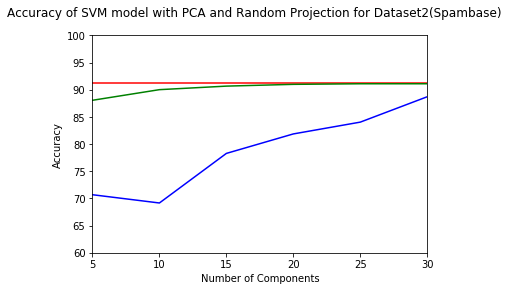

In [44]:
# Plot a graph of number of components used vs accuracies obtained using SVM model
plt.figure()
plt.suptitle("Accuracy of SVM model with PCA and Random Projection for Dataset2(Spambase)")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xlim([5, 30])
plt.ylim([60, 100])
 
# plot the baseline and random projection accuracies

plt.plot(pca_accuracy_svm2['components'], [baseline_svm2] * len(pca_accuracy_svm2['accuracy']), color = "r")
plt.plot(pca_accuracy_svm2['components'], pca_accuracy_svm2['accuracy'], color='g')
plt.plot(rp_accuracy_svm2['components'], rp_accuracy_svm2['accuracy'], color='b')

plt.show()

In [45]:
#K Nearest Neighbour (with 5 neighbours)
#KNN model without Dimensionality reduction(no PCA/RP)

from sklearn.neighbors import KNeighborsClassifier

knn_baseline2 = KNeighborsClassifier(n_neighbors=5)
knn_baseline2.fit(X2_train, y2_train.values.ravel())

#Accuracy of model without using PCA or Random Projection
baseline_knn2 = metrics.accuracy_score(knn_baseline2.predict(X2_test), y2_test)*100

In [46]:
baseline_knn2

91.53094462540716

In [47]:
#To store accuracy of models
pca_accuracy_knn2=pd.DataFrame( columns=['accuracy','components']);
rp_accuracy_knn2=pd.DataFrame( columns=['accuracy','components']);


In [48]:
#Training and finding accuracy of KNN model using PCA
for components in C2:
    #Applying PCA for the Training data
    pca1=PCA(n_components=components)
    X=pca1.fit_transform(X2_train)
    PCA(copy=True, iterated_power='auto', n_components=components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
    
    #Decision tree after applying PCA
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X, y2_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = pca1.transform(X2_test)
    a=accuracy_score(model.predict(test), y2_test)*100
    pca_accuracy_knn2=pca_accuracy_knn2.append([{'accuracy' : a, 'components' : components}])

In [49]:
#Training and finding accuracy of KNN model using Sparse Random Projection
for components in C2:
    #Applying Sparse Random Projection for the Training data
    srp = SparseRandomProjection(n_components = components)
    X = srp.fit_transform(X2_train)
    
    #Decision tree after applying Sparse Random Projection
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X, y2_train.values.ravel())
    
    # evaluate the model and accuracies at respective components are noted
    test = srp.transform(X2_test)
    a=accuracy_score(model.predict(test), y2_test)*100
    rp_accuracy_knn2=rp_accuracy_knn2.append([{'accuracy' : a, 'components' : components}])

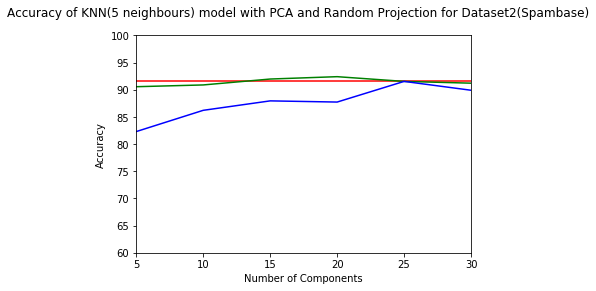

In [50]:
# Plot a graph of number of components used vs accuracies obtained using KNN model
plt.figure()
plt.suptitle("Accuracy of KNN(5 neighbours) model with PCA and Random Projection for Dataset2(Spambase)")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xlim([5, 30])
plt.ylim([60, 100])
 
# plot the baseline and random projection accuracies

plt.plot(pca_accuracy_knn2['components'], [baseline_knn2] * len(pca_accuracy_knn2['accuracy']), color = "r")
plt.plot(pca_accuracy_knn2['components'], pca_accuracy_knn2['accuracy'], color='g')
plt.plot(rp_accuracy_knn2['components'], rp_accuracy_knn2['accuracy'], color='b')

plt.show()

In [51]:
# Creating a subplot, such that we can display all these graphs side by side

#Adding extra column to the Dataframe where accuracy of models with respective components are present
#This extra column includes the value of Baseline model accuracies(model accuracy without dimensionality rduction)
#baseline_DT
pca_accuracy['baseline']=baseline_DT
rp_accuracy['baseline']=baseline_DT
pca_accuracy=pca_accuracy.astype(float)
rp_accuracy=rp_accuracy.astype(float)

#baseline_svm
pca_accuracy_svm['baseline']=baseline_svm
rp_accuracy_svm['baseline']=baseline_svm
pca_accuracy_svm=pca_accuracy_svm.astype(float)
rp_accuracy_svm=rp_accuracy_svm.astype(float)

#baseline_knn
pca_accuracy_knn['baseline']=baseline_knn
rp_accuracy_knn['baseline']=baseline_knn
pca_accuracy_knn=pca_accuracy_knn.astype(float)
rp_accuracy_knn=rp_accuracy_knn.astype(float)

#baseline_DT2
pca_accuracy2['baseline']=baseline_DT2
rp_accuracy2['baseline']=baseline_DT2
pca_accuracy2=pca_accuracy2.astype(float)
rp_accuracy2=rp_accuracy2.astype(float)

#baseline_svm2
pca_accuracy_svm2['baseline']=baseline_svm2
rp_accuracy_svm2['baseline']=baseline_svm2
pca_accuracy_svm2=pca_accuracy_svm2.astype(float)
rp_accuracy_svm2=rp_accuracy_svm2.astype(float)

#baseline_knn2
pca_accuracy_knn2['baseline']=baseline_knn2
rp_accuracy_knn2['baseline']=baseline_knn2
pca_accuracy_knn2=pca_accuracy_knn2.astype(float)
rp_accuracy_knn2=rp_accuracy_knn2.astype(float)

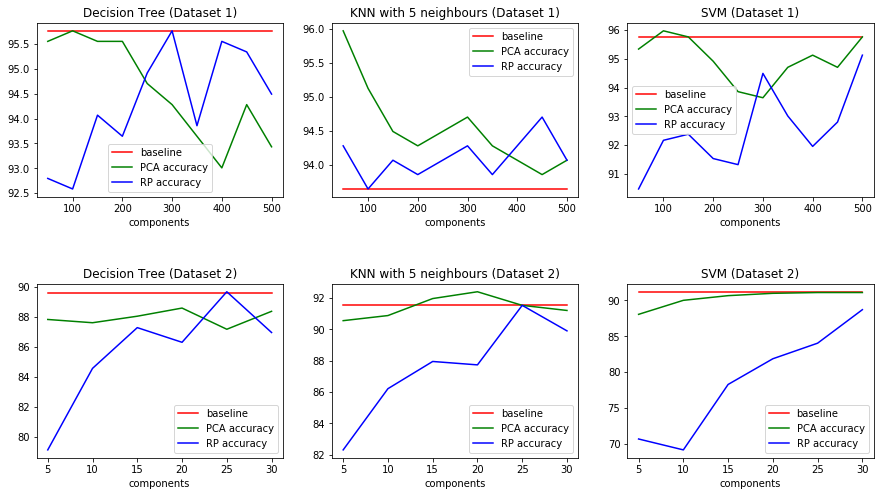

In [53]:
#Creating a subplot and plotting the model accuracies
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

pca_accuracy.plot(x='components',y='baseline',color='r',ax=axes[0][0],title="Decision Tree (Dataset 1)")
pca_accuracy.plot(x='components',y='accuracy',ax=axes[0][0],color='g',label='PCA accuracy')
rp_accuracy.plot(x='components',y='accuracy',ax=axes[0][0],color='b',label='RP accuracy')

pca_accuracy_knn.plot(x='components',y='baseline',color='r',ax=axes[0][1],title="KNN with 5 neighbours (Dataset 1)")
pca_accuracy_knn.plot(x='components',y='accuracy',ax=axes[0][1],color='g',label='PCA accuracy')
rp_accuracy_knn.plot(x='components',y='accuracy',ax=axes[0][1],color='b',label='RP accuracy')

pca_accuracy_svm.plot(x='components',y='baseline',color='r',ax=axes[0][2],title="SVM (Dataset 1)")
pca_accuracy_svm.plot(x='components',y='accuracy',ax=axes[0][2],color='g',label='PCA accuracy')
rp_accuracy_svm.plot(x='components',y='accuracy',ax=axes[0][2],color='b',label='RP accuracy')


pca_accuracy2.plot(x='components',y='baseline',color='r',ax=axes[1][0],title="Decision Tree (Dataset 2)")
pca_accuracy2.plot(x='components',y='accuracy',ax=axes[1][0],color='g',label='PCA accuracy')
rp_accuracy2.plot(x='components',y='accuracy',ax=axes[1][0],color='b',label='RP accuracy')

pca_accuracy_knn2.plot(x='components',y='baseline',color='r',ax=axes[1][1],title="KNN with 5 neighbours (Dataset 2)")
pca_accuracy_knn2.plot(x='components',y='accuracy',ax=axes[1][1],color='g',label='PCA accuracy')
rp_accuracy_knn2.plot(x='components',y='accuracy',ax=axes[1][1],color='b',label='RP accuracy')

pca_accuracy_svm2.plot(x='components',y='baseline',color='r',ax=axes[1][2],title="SVM (Dataset 2)")
pca_accuracy_svm2.plot(x='components',y='accuracy',ax=axes[1][2],color='g',label='PCA accuracy')
rp_accuracy_svm2.plot(x='components',y='accuracy',ax=axes[1][2],color='b',label='RP accuracy')
